In [1]:
%matplotlib inline


Bad key text.latex.unicode in file C:\Miniconda3\envs\sps620env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.latex.preview in file C:\Miniconda3\envs\sps620env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 125 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Miniconda3\envs\sps620env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 157 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import requests
import seaborn as sns

In [4]:
e = nx.read_pajek("chapter1/egypt_retweets.net")
len(e)

25178

### Use _connected_components_ instead of _connected_component_subgraphs_ for new versions of NetworkX

In [5]:
len(list(nx.connected_components(e)))

3122

(array([3.121e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000e+00, 1.77710e+03, 3.55320e+03, 5.32930e+03, 7.10540e+03,
        8.88150e+03, 1.06576e+04, 1.24337e+04, 1.42098e+04, 1.59859e+04,
        1.77620e+04]),
 <BarContainer object of 10 artists>)

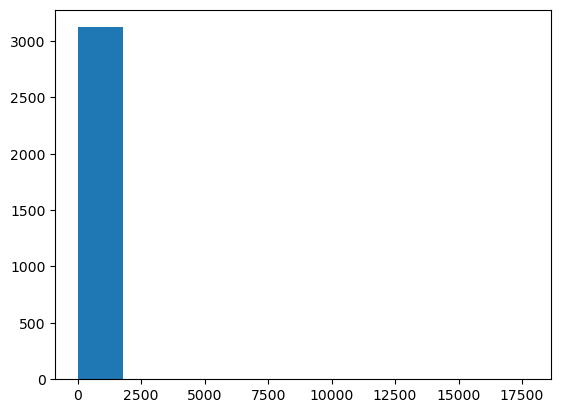

In [6]:
x = [len(c) for c in nx.connected_components(e)]
plt.hist(x)

In [7]:
[len(c) for c in nx.connected_components(e) if len(c) > 10]

[17762, 64, 16, 13, 11, 11, 14, 16]

In [8]:
def trim_edges(g, weight=1):
    """
    Takes a graph, and applies a threshold (“water level”), 
    letting all edges above a certain value through, and removing all others. 
    
    It returns a copy of the original graph, so it’s non-destructive
    """
    g2 = nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f, to, **edata)
    
    return g2

In [9]:
def island_method(g, iterations=5):
    weights = [edata['weight'] for f, to, edata in g.edges(data=True)]
    mn = int(min(weights))
    mx = int(max(weights))
    # compute the size of the step, so we get a reasonable step in iterations
    step = int((mx-mn)/iterations)
    
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

### Convert the generator of connected components to a list (to mimic the book)

In [50]:
subgraphs = list(nx.connected_components(e))

In [55]:
cc = e.subgraph(subgraphs[0])

### Apply the island method

In [56]:
# reate the induced subgraph of the component
islands = island_method(e.subgraph(cc))

In [57]:
for i in islands:
    # print the threshold level, size of the graph, and number of connected components
    print (i[0], len(i[1]), len(list(nx.connected_components(i[1]))))

1 12360 314
62 27 11
123 8 3
184 5 2
245 5 2


In [ ]:
###########################

In [10]:
nx.connected_components(e)

<generator object connected_components at 0x000001599537AB48>

In [45]:
for i, (f, to, edata) in enumerate(e.subgraph(cc).edges(data=True)):
    print(i, f, to, edata)
    if i > 10: break

0 partager1973 PJCrowley {'weight': 3.0}
1 RaoufRamahy esraa_ali {'weight': 1.0}
2 annaberlin1983 arwasm {'weight': 1.0}
3 alexander_drake Colvinius {'weight': 2.0}
4 TwiddleEastNews alaa {'weight': 1.0}
5 TwiddleEastNews ptypk {'weight': 1.0}
6 TwiddleEastNews sharifkouddous {'weight': 2.0}
7 TwiddleEastNews realrissa {'weight': 1.0}
8 TwiddleEastNews _Sheri_Lynn_ {'weight': 1.0}
9 TwiddleEastNews HerQ10 {'weight': 1.0}
10 TwiddleEastNews stand4haq {'weight': 2.0}
11 MartinaArapovic monaeltahawy {'weight': 2.0}


In [39]:
weights = [edata['weight'] for f, to, edata in e.subgraph(cc).edges(data=True)]

In [47]:
e.add_edge?

Signature: e.add_edge(u_for_edge, v_for_edge, key=None, **attr)
Docstring:
Add an edge between u and v.

The nodes u and v will be automatically added if they are
not already in the graph.

Edge attributes can be specified with keywords or by directly
accessing the edge's attribute dictionary. See examples below.

Parameters
----------
u_for_edge, v_for_edge : nodes
    Nodes can be, for example, strings or numbers.
    Nodes must be hashable (and not None) Python objects.
key : hashable identifier, optional (default=lowest unused integer)
    Used to distinguish multiedges between a pair of nodes.
attr : keyword arguments, optional
    Edge data (or labels or objects) can be assigned using
    keyword arguments.

Returns
-------
The edge key assigned to the edge.

See Also
--------
add_edges_from : add a collection of edges

Notes
-----
To replace/update edge data, use the optional key argument
to identify a unique edge.  Otherwise a new edge will be created.

NetworkX algorithms desi

In [30]:
nx.connected_components?

Signature: nx.connected_components(G)
Docstring:
Generate connected components.

Parameters
----------
G : NetworkX graph
   An undirected graph

Returns
-------
comp : generator of sets
   A generator of sets of nodes, one for each component of G.

Raises
------
NetworkXNotImplemented
    If G is directed.

Examples
--------
Generate a sorted list of connected components, largest first.

>>> G = nx.path_graph(4)
>>> nx.add_path(G, [10, 11, 12])
>>> [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
[4, 3]

If you only want the largest connected component, it's more
efficient to use max instead of sort.

>>> largest_cc = max(nx.connected_components(G), key=len)

To create the induced subgraph of each component use:

>>> S = [G.subgraph(c).copy() for c in nx.connected_components(G)]

See Also
--------
strongly_connected_components
weakly_connected_components

Notes
-----
For undirected graphs only.
File:      c:\miniconda3\envs\workenv\lib\site-packages\networkx

In [58]:
nx.ego_graph(cc, 'justinbieber')

In [72]:
## we need to convert the ego network from a Multi-graph to a simple Graph
bieb = nx.Graph(nx.ego_graph(cc, 'justinbieber', radius=2))
len(bieb)

nx.average_clustering(bieb)

22

0.12727272727272726

In [71]:
ghonim = nx.Graph(nx.ego_graph(cc, 'Ghonim', radius=2))
len(ghonim)

nx.average_clustering(ghonim)

3450

0.04332254475699308

In [65]:
nx.average_clustering?

Signature: nx.average_clustering(G, nodes=None, weight=None, count_zeros=True)
Docstring:
Compute the average clustering coefficient for the graph G.

The clustering coefficient for the graph is the average,

.. math::

   C = \frac{1}{n}\sum_{v \in G} c_v,

where :math:`n` is the number of nodes in `G`.

Parameters
----------
G : graph

nodes : container of nodes, optional (default=all nodes in G)
   Compute average clustering for nodes in this container.

weight : string or None, optional (default=None)
   The edge attribute that holds the numerical value used as a weight.
   If None, then each edge has weight 1.

count_zeros : bool
   If False include only the nodes with nonzero clustering in the average.

Returns
-------
avg : float
   Average clustering

Examples
--------
>>> G = nx.complete_graph(5)
>>> print(nx.average_clustering(G))
1.0

Notes
-----
This is a space saving routine; it might be faster
to use the clustering function to get a list and then take the average.

Self l